In [1]:
import sys
sys.path.insert(0, "..")

In [2]:
import torch
import numpy as np
from typing import List
import matplotlib.pyplot as plt
from einops import rearrange

import sampling
import sde_lib
from models.model_configs import instantiate_model

In [5]:
def display(image):
    x = image.squeeze(0)
    x = rearrange(x, 'c h w -> h w c')
    x = x.numpy()
    plt.imshow(x)
    plt.show()


# device = get_device()
device = "cuda:1"

inverse_scaler = lambda x: x * 0.5 + 0.5  # [-1, 1] to [0, 1]
sampling_shape = (1, 3, 64, 64)  # (B, C, H, W)



def inference(checkpoint_path: str):
    sde = sde_lib.RectifiedFlow()
    model=instantiate_model("score_matching")
    checkpoint = torch.load(checkpoint_path)
    model.load_state_dict(checkpoint)
    model=model.to(device)
    model.eval()

    sampling_fn = sampling.get_sampling_fn("rectified_flow", sde, sampling_shape, inverse_scaler, 1e-3, device=device)
    sample, n = sampling_fn(model)

    print("Generated Image size:", sample.shape)

    display(sample.cpu())

Init. Distribution Variance: 1.0
SDE Sampler Variance: 0.0
ODE Tolerence: 1e-05


/tmp/ipykernel_982194/2604589545.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path)


Type of Sampler: rk45


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9630859..1.0235406].


Generated Image size: torch.Size([1, 3, 64, 64])


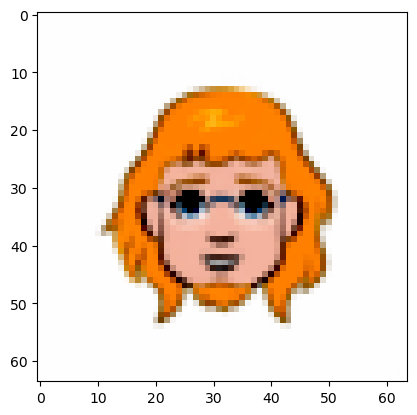

In [14]:
inference("../model_epoch_100.pth")